In [1]:
from qiskit.quantum_info import Statevector,concurrence,DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

In [202]:
def random_statevector_given_fidelity(dims, lbound,ubound, seed=None):
    """Generator a random Statevector.

    The statevector is sampled from the uniform (Haar) measure.

    Args:
        dims (int or tuple): the dimensions of the state.
        seed (int or np.random.Generator): Optional. Set a fixed seed or
                                           generator for RNG.

    Returns:
        Statevector: the random statevector.
    """
    if seed is None:
        rng = np.random.default_rng()
    elif isinstance(seed, np.random.Generator):
        rng = seed
    else:
        rng = default_rng(seed)

    dim = np.product(dims)

    # Random array over interval (0, 1]
    x = rng.random(dim)
    x += x == 0
    x = -np.log(x)

    sumx = sum(x)
    phases = rng.random(dim) * 2.0 * np.pi

    y = x / sumx

    rnd = np.random.uniform(low=np.sqrt(lbound), high=np.sqrt(ubound))

    k = (y[3] + rnd*(y[1] + y[2] + y[3]))/(1-rnd)

    sumy = sum(y)

    
    y[0] = k

    z = y / sum(y)

    return Statevector(np.sqrt(z) * np.exp(1j * phases), dims=dims)

def check_arccos(x):
    '''Ensure I'm getting real values for my arccos'''
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    return -1 <= -s*(1-s)/(4*p) <= 0

def random_statevector2_given_fidelity(dim,lbound,ubound,conc):
    '''generate a random state vector with a given fidelity and concurrence'''
    r = True
    while r:
        x = random_statevector_given_fidelity(dim,lbound,ubound)
        r = not (check_conc(x,conc) and check_arccos(x))
    return x

def check_conc(x,conc):
    ''' check the concurrence of my density matrix against a desired value. Returns True if we are good'''
    c = np.round(concurrence(DensityMatrix(x)),2)
    return conc == c

def beta(F):
    '''beta function'''
    return 2*np.arccos(np.sqrt(F))/np.pi

def alpha(F):
    '''alpha function'''
    return 4*np.arccos(np.sqrt(F))/(np.pi**2)

def min_time_2(conc,dim,lbound,ubound):
    #x = gen_density_matrix_bounded(conc,dim,lbound,ubound)
    x = random_statevector2_given_fidelity(dim,lbound,ubound,conc)
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    K = abs(x[3])**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    DE = np.sqrt((2*K) + np.sqrt(F) - F)

    return 2*DE*omega/(np.pi*beta(F))

def min_time_1(conc,dim,lbound,ubound):
    #x = gen_density_matrix_bounded(conc,dim,lbound,ubound)
    x = random_statevector2_given_fidelity(dim,lbound,ubound,conc)
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    E = 1 - np.sqrt(F)

    return 2*E*omega/(np.pi*(beta(F)**2))

def lower_bound_1(x):
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    E = 1 - np.sqrt(F)

    return 2*E*omega/(np.pi*alpha(F))

def lower_bound_2(x):
    F = (abs(x[0])**2 - abs(x[3])**2)**2
    K = abs(x[3])**2
    p = abs(x[0]**2) * abs(x[3]**2)
    s = abs(x[0]**2) + abs(x[3]**2)
    omega = np.arccos(-s*(1-s)/(4*p))
    DE = np.sqrt((2*K) + np.sqrt(F) - F)

    return 2*DE*omega/(np.pi*beta(F))

def lower_bound_3(x):
    a0 = abs(x[0])**2
    a3 = abs(x[3])**2
    F = (a0 - a3)**2
    #K = abs(x[3])**2
    #p = abs(x[0]**2) * abs(x[3]**2)
    p = a0*a3
    #s = abs(x[0]**2) + abs(x[3]**2)
    s = a0 + a3
    #K = s/2
    omega = np.arccos(-s*(1-s)/(4*p))
    #DE = np.sqrt((2*K) - F)
    #DE = np.sqrt((1-a0+a3)**2 - (1-a0+(3*a3)))
    DE = np.sqrt((1-a0+(3*a3)) - (1-a0+a3)**2)

    return 2*DE*omega/(np.pi*beta(F))

def lower_bound_1(x):
    #F = (abs(x[0])**2 - abs(x[3])**2)**2
    #p = abs(x[0]**2) * abs(x[3]**2)
    #s = abs(x[0]**2) + abs(x[3]**2)
    a0 = abs(x[0])**2
    a3 = abs(x[3])**2
    F = (a0 - a3)**2
    p = a0*a3

    s = a0 + a3
    omega = np.arccos(-s*(1-s)/(4*p))
    E = 1 - a0 + a3

    return 2*E*omega/(np.pi*alpha(F))

def orthogonal_lower_bound_master(conc):
    x = random_statevector2_given_fidelity(4,0,0,conc)
    return lower_bound_2(x)

orthogonal_lower_bound_master(0.02)


1.3375338258346667

In [19]:
orthogonal_lower_bound_master(0.01)

NameError: name 'orthogonal_lower_bound_master' is not defined

In [30]:
with open('res_orthogonal.txt', 'w') as fw:
    np.savetxt(fw,res_orthogonal)

array([[0.05      , 1.28687651],
       [0.05      , 1.25534465],
       [0.05      , 1.38905576],
       ...,
       [0.99      , 1.07362304],
       [0.99      , 1.03070316],
       [0.99      , 1.01107596]])

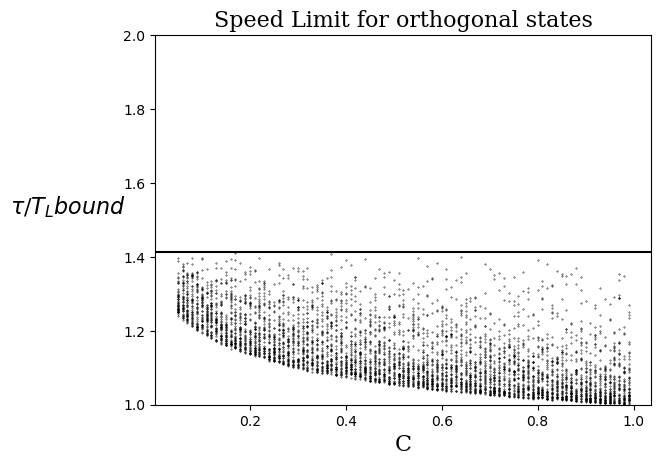

In [5]:
x  = np.loadtxt('res_orthogonal.txt')
plt.scatter(x.T[0], x.T[1], s = .1,color='black')
plt.xlabel('C', fontdict = font)
plt.ylim([1,2])
plt.ylabel('$\\tau$/${T_Lbound}$', fontdict = font,rotation=0,labelpad=40)
plt.axhline(y=np.sqrt(2),color='black')
plt.title('Speed Limit for orthogonal states', fontdict = font)
plt.show()

In [ ]:
rng = np.arange(0.01,1,0.05)
len(rng)
shots = 5
res_orthogonal1 = np.zeros((len(rng)*shots,2))
for i in range(len(rng)):

    for j in range(shots):

        
        print(rng[i])
        a = np.round(rng[i],2)
        res_orthogonal1[(i*shots)+j][0] = a
        res_orthogonal1[(i*shots)+j][1] = orthogonal_lower_bound_master(a)

#res_orthogonal

0.01


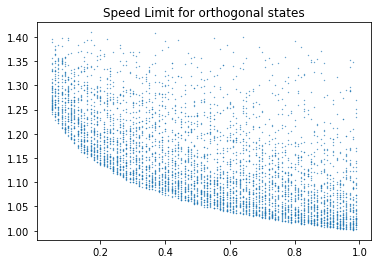

In [20]:
plt.scatter(res_orthogonal.T[0], res_orthogonal.T[1], s = .1)
plt.title('Speed Limit for orthogonal states')
plt.show()

In [208]:
def part_b_lower_bound_master(conc,lbound,ubound):
    x = random_statevector2_given_fidelity(4,lbound,ubound,conc)
    return lower_bound_1(x),lower_bound_2(x)


def part_b_lower_bound_master(conc,lbound,ubound):
    x = random_statevector2_given_fidelity(4,lbound,ubound,conc)
    return lower_bound_1(x),lower_bound_3(x)
part_b_lower_bound_master(.80,.35,.4)

(1.0848405399730943, 1.3540882103519765)

In [215]:
with open('res_arb3_0602_2240.txt', 'w') as fw:
    np.savetxt(fw,res_arb3)

In [214]:
rng = np.arange(0.22,.4,0.01)
len(rng)
lbound = 0.35
ubound = .4
shots = 500
res_arb3 = np.zeros((len(rng)*shots,3))
for i in range(len(rng)):

    for j in range(shots):

        print(rng[i])
        a = np.round(rng[i],2)
        res_arb3[(i*shots)+j][0] = a
        b = part_b_lower_bound_master(a,lbound,ubound)
        res_arb3[(i*shots)+j][1] = b[0]
        res_arb3[(i*shots)+j][2] = b[1]

0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22
0.22


0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002
0.24000000000000002


0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25


0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.28
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000

0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004
0.29000000000000004


0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004


0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005
0.31000000000000005


0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006
0.32000000000000006


0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007


0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007
0.33000000000000007


0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000000001
0.3400000000

0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000

0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000000001
0.3600000000

0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000000001
0.3700000000

0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000000001
0.3800000000

0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000

0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001
0.3900000000000001


In [216]:
x  = np.loadtxt('res_arb1.txt')
x1  = np.loadtxt('res_arb3_0602_2240.txt')
x2  = np.loadtxt('res_arb3_0602_4080.txt')



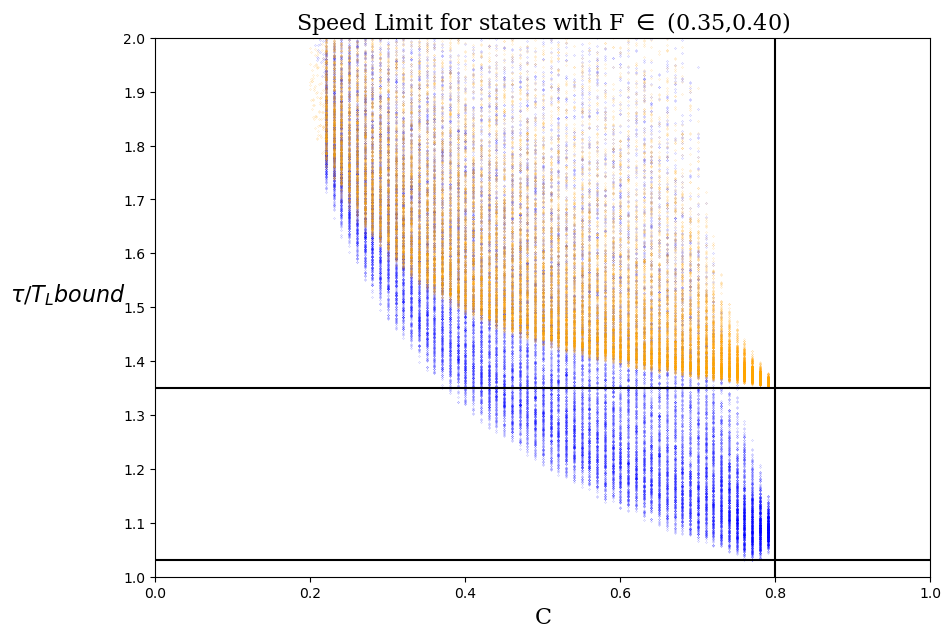

In [226]:
res_arb = np.concatenate((x,x1))
res_arb = np.concatenate((res_arb,x2))
plt.figure(figsize = (10.0,7.0))
plt.scatter(res_arb.T[0], res_arb.T[1], s = .01,color = 'blue')
plt.scatter(res_arb.T[0], res_arb.T[2], s = .01,color = 'orange')
plt.xlim(0,1)
plt.ylim(1,2)
plt.yticks(np.arange(1.0,2.1,0.1))
#plt.plot([1.091,1.091])
#plt.plot([1.351,1.351])
#plt.plot([1,2],(0.8,.8))
plt.axvline(x=0.8,color = 'black')
plt.axhline(y=1.351,color = 'black')
plt.axhline(y=1.031,color = 'black')
#plt.annotate('P1', xy=(.8,1.351), textcoords='data') 

plt.xlabel('C', fontdict = font)
plt.ylabel('$\\tau$/${T_Lbound}$', fontdict = font,rotation=0,labelpad=40)
plt.title('Speed Limit for states with F $\in$ (0.35,0.40)', fontdict = font)
plt.show()

In [200]:
[res_arb3[j][1] for j in range(len(res_arb3))]
#res_arb3[3][2]

[1.3275931586820864,
 1.479580536162222,
 1.132581873140657,
 1.2907818039413281,
 1.4041171598130726,
 1.183389735337474,
 1.2189541678405946,
 1.2257551843063417,
 1.1973260341311522,
 1.2349222158645423,
 1.2695976372467528,
 1.390261232520086,
 1.1735844018931938,
 1.157348780238563,
 1.0658321261963881,
 1.0782361521218566,
 1.2470554571337915,
 1.4487426468982227,
 1.3038901555444353,
 1.4535101826865726,
 1.4789126630105418,
 1.5018089838692263,
 1.194445889497626,
 1.3091802110133288,
 1.3064935456733746,
 1.168624572705224,
 1.230116756254375,
 1.4160633877445976,
 1.3931178853050785,
 1.2686425911746313,
 1.3150532633893683,
 1.3038002112952851,
 1.2957064018657332,
 1.353045295703065,
 1.2341323370664241,
 1.4191851321318756,
 1.1129937732903696,
 1.4668074756721319,
 1.3138925370983925,
 1.2942726336937271,
 1.5947382758669562,
 1.1350241950265525,
 1.1418703595599282,
 1.3575611728269181,
 1.2052523980977208,
 1.3112171376089972,
 1.171661382127986,
 1.151069529017617,
 1.

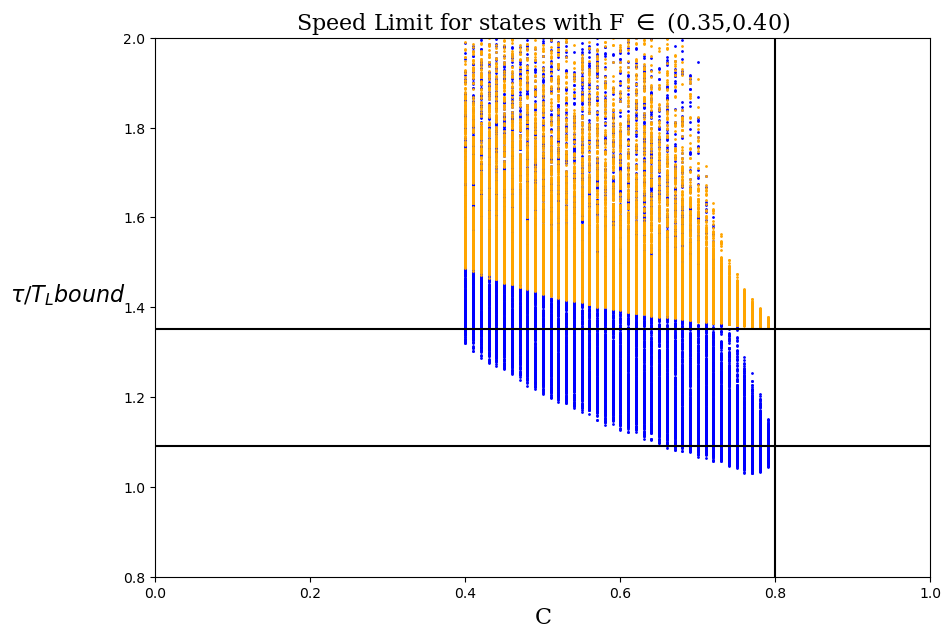

In [212]:
res_arb = res_arb3
plt.figure(figsize = (10.0,7.0))
plt.scatter(res_arb.T[0], res_arb.T[1], s = 1,color = 'blue')
plt.scatter(res_arb.T[0], res_arb.T[2], s = 1,color = 'orange')
plt.xlim(0,1)
plt.ylim(0.8,2)
#plt.plot([1.091,1.091])
#plt.plot([1.351,1.351])
#plt.plot([1,2],(0.8,.8))
plt.axvline(x=0.8,color = 'black')
plt.axhline(y=1.351,color = 'black')
plt.axhline(y=1.091,color = 'black')
#plt.annotate('P1', xy=(.8,1.351), textcoords='data') 

plt.xlabel('C', fontdict = font)
plt.ylabel('$\\tau$/${T_Lbound}$', fontdict = font,rotation=0,labelpad=40)
plt.title('Speed Limit for states with F $\in$ (0.35,0.40)', fontdict = font)
plt.show()

In [176]:
beta(0.35)
beta(beta(0.35))

def alpha(F):
    rng = np.arange(-np.sqrt(F),np.sqrt(F),0.1)
    if not len(rng):
        rng = np.array([0])
    #print(rng)
    r = np.zeros((len(rng),1))
   
    for i in range(len(rng)):
        #print(rng[i])
        z = rng[i]
        #print(z)
        #c = np.sqrt((1-F)/(F-1+ 4*z(1-z)))
        c = np.sqrt((1-F)/(F - 1 + 4*z*(1-z)))
        #c = np.arccos(((2*F) - 1 - (z**2)))/(1-(z**2))
        r[i] = c*(1-2*z)/(1-z)
    return min(2*r/np.pi)[0]

alpha(0.)
#np.arange(-np.sqrt(0.1),np.sqrt(0.1),0.1)

C:\Users\stephen\AppData\Local\Temp\ipykernel_6304\2408639752.py:16: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt((1-F)/(F - 1 + 4*z*(1-z)))


nan